#### 공부 시간과 과외횟수에 따른 점수 예측하기
- 목표 : 공부 시간과 과외 횟수가 가지는 패턴/규칙을 찾아 점수 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간, 과외 횟수
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 학습 알고리즘 : 선형회귀 <== [조건] 데이터의 분포가 선형분포여야함!

In [1]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

[1] 데이터 준비

In [2]:
# 임의의 데이터
hour = [1,3,4,5,7,9,10]
jumsu = [32,55,83,70,99,92,100]
lesson = [0,0,2,1,2,0,1]

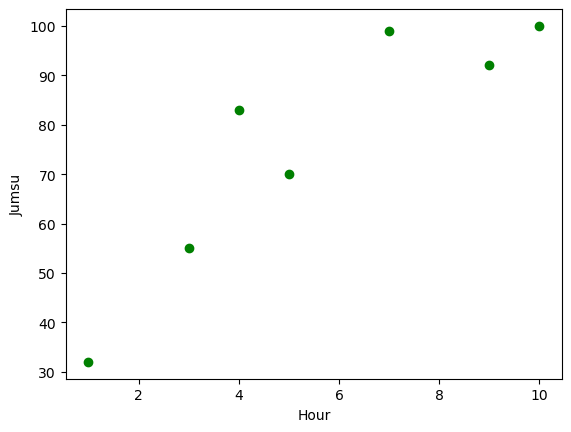

In [3]:
### 현재 데이터의 분포 확인
plt.plot(hour, jumsu,'go')
plt.xlabel('Hour')
plt.ylabel('Jumsu')
plt.show()

In [4]:
dataDF =  pd.DataFrame({'Hour':hour, 'Lesson':lesson})
jumsuSR = pd.Series(jumsu)

[2] 모델 생성 및 학습 진행

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [7]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(dataDF, jumsuSR)

LinearRegression()

In [10]:
# 학습 후 모델 파라미터 => 피쳐가 2개 => coef_ 2개 (절편은 항상 1개)
print(f'model.coef_ : {len(model.coef_)}개, {model.coef_}')
print(f'model.intercept_ : {model.intercept_}')

model.coef_ : 2개, [ 6.27924892 11.61819933]
model.intercept_ : 30.914299470390006


[3] 모델 성능 평가

In [11]:
### 모듈로딩 => 손실/비용함수로 오차 계산, 결정계수
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
# 점수 => 내부에서 predict() 진행 ===> 결과로 R2 계수 추출해서 반환
score = model.score(dataDF, jumsuSR)
print(f'score : {score}')
# 선형회귀의 score = metrics의 결정계수

score : 0.9649627963178466


In [13]:
# 성능 지표 => 오차계산과 결정계수 계산
pre_jumsu = model.predict(dataDF)

# 손실/비용 계산 함수 (0에 가까울수록 좋음) ==> 정답과 예측값
mse = mean_squared_error(jumsuSR, pre_jumsu)
rmse = mean_squared_error(jumsuSR, pre_jumsu, squared=False)
mae = mean_squared_error(jumsuSR, pre_jumsu)\

# 얼마나 정답에 가깝게 값을 예측 했느냐를 나타내는 지표 (1에 가까울수록 좋음) ==> 정답과 예측값 제공
r2 = r2_score(jumsuSR, pre_jumsu)

In [14]:
## 손실/비용함수 값은 0에 가까울수록
# 결정계수(R2)의 값은 1에 가까울수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 19.134603480294373
rmse : 4.374311772187069
mae : 19.134603480294373
r2 : 0.9649627963178466
